<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [5]:
!pip install wget

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=135ec0ff885f422a6caa64cb523c6e112c290ee097ef95ecb6e9c88087cea2e8
  Stored in directory: c:\users\dzhang\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [8]:
import wget

site_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv"
wget.download(site_url)

# !wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

100% [..............................................................................] 23101 / 23101

'loan_train.csv'

### Load Data From CSV File


In [9]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [10]:
df.shape

(346, 10)

### Convert to date time object


In [11]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [12]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [13]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\dzhang\Anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.3.29  |       haa95532_1         160 KB  anaconda
    certifi-2021.10.8          |   py39haa95532_2         156 KB  anaconda
    conda-4.13.0               |   py39haa95532_0        1016 KB  anaconda
    openssl-1.1.1n             |       h2bbff1b_0         5.8 MB  anaconda
    seaborn-0.11.2             |     pyhd3eb1b0_0         223 KB  anaconda
    ------------------------------------------------------------
                                           Total:         7.3 MB

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> anaconda::conda-4.13.0-py39haa95532_0

The following packages will be SUPERSEDED by a higher



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda




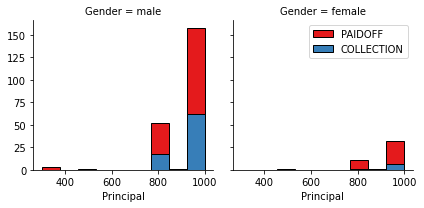

In [14]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

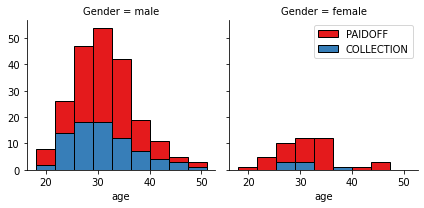

In [15]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


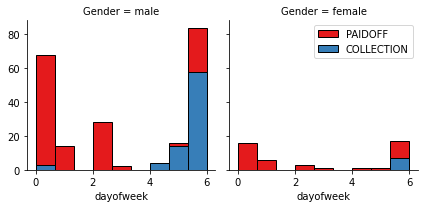

In [16]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [17]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [18]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [19]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [20]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [21]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [22]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [23]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [79]:

df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value = [0, 1], inplace=True)
# y[0:5]
# print(type(y))

df.head()

y = df['loan_status']
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [80]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=20)

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [132]:
n = 30
accuracy = np.zeros(n)
for i in range(1,n+1):
    clf = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_test_predicted = clf.predict(X_test)
    accuracy[i-1] = (accuracy_score(y_test, y_test_predicted))
accuracy

array([0.6       , 0.6       , 0.61428571, 0.65714286, 0.64285714,
       0.61428571, 0.67142857, 0.65714286, 0.64285714, 0.65714286,
       0.65714286, 0.64285714, 0.62857143, 0.65714286, 0.61428571,
       0.62857143, 0.64285714, 0.6       , 0.61428571, 0.64285714,
       0.64285714, 0.64285714, 0.67142857, 0.64285714, 0.67142857,
       0.67142857, 0.68571429, 0.65714286, 0.67142857, 0.67142857])

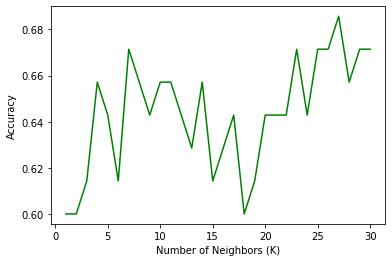

Maximum Accuracy Got is - 


,0
26,0.685714


In [84]:
# from the accuracy score we could see, n = 25 gives us the best accuracy based on the accuracy measure. 
# hence use n = 25 to train and test our model

plt.plot(range(1,n+1),accuracy,'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()

accuracy = pd.DataFrame(accuracy)
print("Maximum Accuracy Got is - " )
accuracy.sort_values(by = 0, ascending = False)[0:1]

In [138]:
clf_KNN_best = KNeighborsClassifier(n_neighbors = 25).fit(X_train, y_train)
y_test_KNN = clf_KNN_best.predict(X_test)
accuracy = (accuracy_score(y_test, y_test_KNN))
j_index = jaccard_score(y_true=y_test,y_pred= y_test_KNN)


print(accuracy_score(y_test, y_test_KNN))
print(classification_report(y_test, y_test_KNN))
print(confusion_matrix(y_test, y_test_KNN))
print (round(j_index,2))
clf_KNN_best

0.6714285714285714
              precision    recall  f1-score   support

           0       0.67      0.98      0.79        45
           1       0.75      0.12      0.21        25

    accuracy                           0.67        70
   macro avg       0.71      0.55      0.50        70
weighted avg       0.70      0.67      0.58        70

[[44  1]
 [22  3]]
0.12


KNeighborsClassifier(n_neighbors=25)

# Decision Tree


In [113]:
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
import matplotlib.image as mpimg
from sklearn import tree

#Modelling
modeltree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
modeltree.fit(X_train, y_train)

#Prediction
y_test_Tree = modeltree.predict(X_test)
print(predTree[0:5])
print(y_test[0:5])

names = Feature.columns

print(names)

print(accuracy_score(y_test, y_test_Tree))
print(classification_report(y_test, y_test_Tree))
print(confusion_matrix(y_test, y_test_Tree))

[1 1 1 1 0]
63     0
119    0
122    0
47     0
287    1
Name: loan_status, dtype: int64
Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')
0.6571428571428571
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        45
           1       0.52      0.48      0.50        25

    accuracy                           0.66        70
   macro avg       0.62      0.62      0.62        70
weighted avg       0.65      0.66      0.65        70

[[34 11]
 [13 12]]


# Support Vector Machine


In [104]:
from sklearn import svm

In [166]:

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
y_test_SVM = clf.predict(X_test)
y_test_SVM  [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [167]:


print(accuracy_score(y_test, y_test_SVM))
print(classification_report(y_test, y_test_SVM))
print(confusion_matrix(y_test, y_test_SVM))

0.6428571428571429
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        45
           1       0.00      0.00      0.00        25

    accuracy                           0.64        70
   macro avg       0.32      0.50      0.39        70
weighted avg       0.41      0.64      0.50        70

[[45  0]
 [25  0]]


C:\Users\dzhang\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzhang\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzhang\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression


In [116]:
from sklearn.linear_model import LogisticRegression

In [179]:
Lr_params=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
LR_accuracy_scores=[]

for params in Lr_params:
    LR = LogisticRegression(C=0.01, solver=params).fit(X_train,y_train)
    y_train_Lr=LR.predict(X_train)
    LR_accuracy_scores.append(accuracy_score(y_train,y_train_Lr))
    
bestLrScore=max(LR_accuracy_scores)
bestLrParam=Lr_params[LR_accuracy_scores.index(max(LR_accuracy_scores))]
print("The highest accuracy is ",bestLrScore,' using ',bestLrParam,'.')

#Training with the best model.
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)

y_test_LR = LR.predict(X_test)

print(y_test_LR.shape)
print(y_test.shape)

The highest accuracy is  0.7789855072463768  using  newton-cg .
(70,)
(70,)


In [175]:
print(accuracy_score(y_test, y_test_LR))
print(classification_report(y_test, y_test_LR))
print(confusion_matrix(y_test, y_test_LR))

0.6428571428571429
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        45
           1       0.00      0.00      0.00        25

    accuracy                           0.64        70
   macro avg       0.32      0.50      0.39        70
weighted avg       0.41      0.64      0.50        70

[[45  0]
 [25  0]]


C:\Users\dzhang\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzhang\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzhang\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Evaluation using Test set


In [158]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [123]:
site_url_test = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv"
wget.download(site_url_test)

# !wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

100% [................................................................................] 3642 / 3642

'loan_test.csv'

### Load Test set for evaluation


In [154]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()
test_df.shape

(54, 10)

In [148]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] =test_df['effective_date'].dt.dayofweek
test_df['weekend'] =test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

test_df_X = test_df[['Principal','terms','age','Gender','weekend']]
test_df_X = pd.concat([test_df_X,pd.get_dummies(test_df['education'])], axis=1)
test_df_X.drop(['Master or Above'], axis = 1,inplace=True)
test_df_X.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [152]:
# NOrmalize 

test_df_X= preprocessing.StandardScaler().fit(test_df_X).transform(test_df_X)
test_df_X[0:5]
#print(test_df.head())
test_df_X.shape

(54, 8)

In [155]:

test_df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value = [0, 1], inplace=True)
# y[0:5]
# print(type(y))

test_df.head()

test_df_y = test_df['loan_status']
test_df_y[0:5]
test_df_y.shape

(54,)

In [164]:
# KNN Measure

y_hatKnn=clf_KNN_best.predict(test_df_X)

jaccard_scoreKnn=jaccard_score(test_df_y,y_hatKnn)
f1_scoreKnn=f1_score(test_df_y,y_hatKnn)

print(f1_scoreKnn)
print(jaccard_scoreKnn)

0.13333333333333333
0.07142857142857142


In [163]:
#Decision Tree measure

y_hatDt=modeltree.predict(test_df_X)

jaccard_scoreDt=jaccard_score(test_df_y,y_hatDt)
f1_scoreDt=f1_score(test_df_y,y_hatDt)

print(test_df_y.shape,y_hatDt.shape)
print(f1_scoreDt,jaccard_scoreDt)

(54,) (54,)
0.5 0.3333333333333333


In [168]:
#SVM Tree measure

y_hatSvm=clf.predict(test_df_X)
f1_scoreSvm=f1_score(test_df_y, y_hatSvm)
jaccard_scoreSvm=jaccard_score(test_df_y, y_hatSvm)

print(f1_scoreSvm)
print(jaccard_scoreSvm)


0.0
0.0


In [173]:
#regression measure

y_hatLr=LR.predict(test_df_X)

f1_scoreLr=f1_score(test_df_y, y_hatLr)
jaccard_scoreLr=jaccard_score(test_df_y, y_hatLr)
log_lossLr=log_loss(test_df_y,y_hatLr)


print(f1_scoreLr)
print(jaccard_scoreLr)
print(log_lossLr)

0.0
0.0
8.954497583865733


In [174]:
# Final Report


dictReport={
    "Algorithm":["KNN","Decision Tree","SVM","Logistic Regression"],
    "Jaccard":[jaccard_scoreKnn,jaccard_scoreDt,jaccard_scoreSvm,jaccard_scoreLr],
    "F1-Score":[f1_scoreKnn,f1_scoreDt,f1_scoreSvm,f1_scoreLr],
    "Log Loss":[None,None,None,log_lossLr]
}

report=pd.DataFrame(dictReport)
report

,Algorithm,Jaccard,F1-Score,Log Loss
0,KNN,0.071429,0.133333,NaN
1,Decision Tree,0.333333,0.500000,NaN
2,SVM,0.000000,0.000000,NaN
3,Logistic Regression,0.000000,0.000000,8.954498


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
